In [ ]:
!pip3 install hmmlearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 3.6 MB/s eta 0:00:00


In [ ]:
from hmmlearn import hmm
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 


In [ ]:
base_dir="https://github.com/natsunoyuki/Data_Science/blob/master/gold/gold/gold_price_usd.csv?raw=True"
data=pd.read_csv(base_dir)
data.head()

,datetime,gold_price_usd
0,1978-12-29,137.06
1,1979-01-01,137.06
2,1979-01-02,137.29
3,1979-01-03,134.01
4,1979-01-04,136.79


In [ ]:
data["datetime"]=pd.to_datetime(data["datetime"])
data["gold_price_change"]=data["gold_price_usd"].diff()
data.head()


,datetime,gold_price_usd,gold_price_change
0,1978-12-29,137.06,NaN
1,1979-01-01,137.06,0.00
2,1979-01-02,137.29,0.23
3,1979-01-03,134.01,-3.28
4,1979-01-04,136.79,2.78


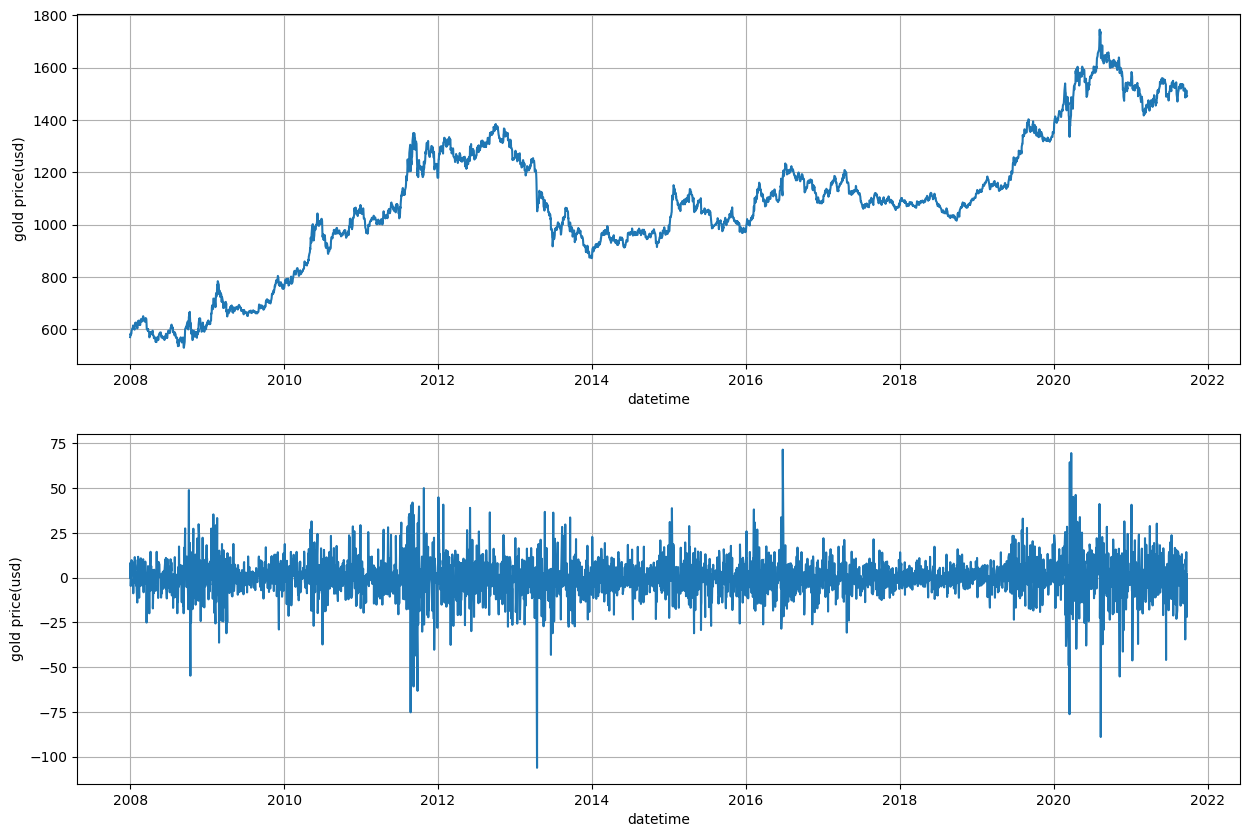

In [ ]:
data=data[data["datetime"]>=pd.to_datetime("2008-01-01")]

plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(data["datetime"],data["gold_price_usd"])
plt.xlabel("datetime")
plt.ylabel("gold price(usd)")
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(data["datetime"],data["gold_price_change"])
plt.xlabel("datetime")
plt.ylabel("gold price(usd)")
plt.grid(True)

In [ ]:
X=data[["gold_price_change"]].values
hmm.GaussianHMM(n_components=3,covariance_type="diag",n_iter=50,random_state=42)
model=hmm.GaussianHMM(n_components=3,covariance_type="diag",n_iter=50,random_state=42)
model.fit(X)
Z=model.predict(X)
state=pd.unique(Z)


In [ ]:
print("unique states are: ", state)

unique states are:  [1 0 2]


In [ ]:
print("start probablities: ", model.startprob_)

start probablities:  [2.25217394e-05 9.99977478e-01 2.27517901e-54]


In [ ]:
print(model.covars_)

[[[ 84.22877262]]

 [[ 29.75024958]]

 [[321.61159569]]]


In [ ]:
model.transmat_

array([[1.18601839e-02, 9.87982221e-01, 1.57595016e-04],
       [7.39251441e-01, 2.11663333e-01, 4.90852259e-02],
       [6.21144512e-02, 1.76534234e-02, 9.20232125e-01]])

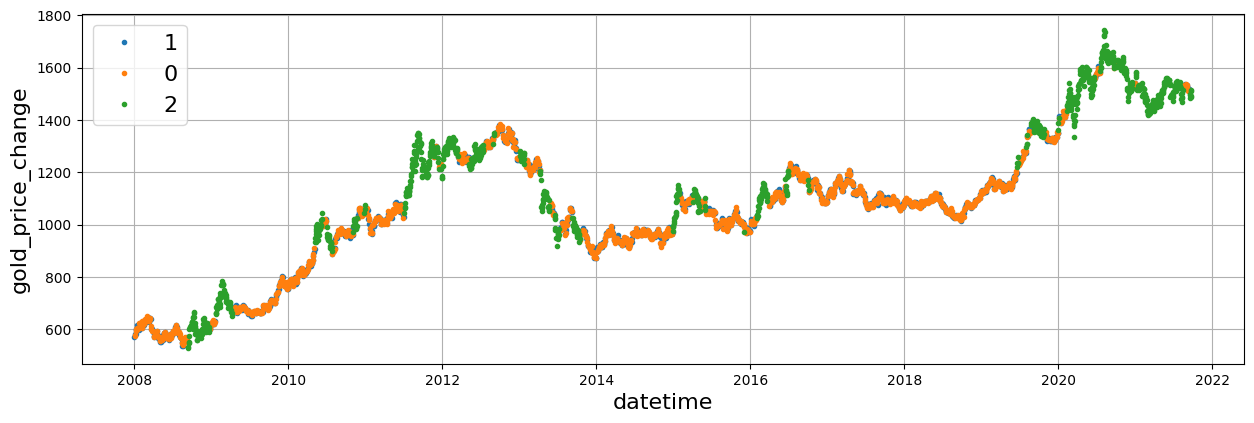

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
for i in state:
  want=(Z==i)
  x=data["datetime"].iloc[want]
  y=data["gold_price_usd"].iloc[want]
  plt.plot(x,y,'.')
plt.legend(state,fontsize=16)
plt.grid(True)
plt.xlabel("datetime",fontsize=16)
plt.ylabel("gold_price_change",fontsize=16)
plt.show()